In [1]:
import netgen.gui
import numpy as np
import matplotlib.pyplot as plt
from ngsolve import *
from netgen.geom2d import *

In [2]:
L2Error = np.zeros(9)
H1Error = np.zeros(9)
k = np.arange(1,10)

In [3]:
def MakeGeometry():
    geo = SplineGeometry()
    
    points = [(0,0), (2,0), (2,1), (1,1), (1,2), (0,2)]
    p1,p2,p3,p4,p5,p6 = [geo.AppendPoint(*pnt) for pnt in points]
    curves = [['line',p1,p2], ['line',p2,p3], ['line',p3,p4], ['line',p4,p5], ['line', p5,p6], ['line',p6,p1]]
    [geo.Append(c) for c in curves]
    return geo

mesh = Mesh(MakeGeometry().GenerateMesh(maxh=0.2))

In [4]:
for i in k:
    # H1 conforming finite element space
    fes = H1(mesh, order=int(i), dirichlet = [1,2,3,4,5,6])
    
    # define trial- and test-functions
    u = fes.TrialFunction()
    v = fes.TestFunction()
    
    # the right hand side
    f = LinearForm(fes)
    f += 1*v*dx
    
    # the bilinear-form
    a = BilinearForm(fes, symmetric=True)
    a += grad(u)*grad(v)*dx
    
    a.Assemble()
    f.Assemble()
    
    # the solution field
    gfu = GridFunction(fes)
    gfu.vec.data = a.mat.Inverse(fes.FreeDofs(), inverse="sparsecholesky") * f.vec
    
    # Add Error
    L2Error[i-1] = sqrt(Integrate ((gfu)*(gfu), mesh) )
    H1Error[i-1] = sqrt(Integrate ( (gfu)*(gfu), mesh) + Integrate(grad(gfu)*grad(gfu),mesh))
    
    print("L2-error:", L2Error[i-1])
    print("H1-error:", H1Error[i-1])
    print(i)
    
    # calculate mean value on / in Omega
    mean = Integrate(gfu, mesh)
    print("mean: ", mean)

    Draw(gfu)
    Draw(grad(gfu), mesh, 'partialderivatives')
    

L2-error: 0.13726701262951155
H1-error: 0.46983428574637415
1
mean:  0.20190202330657517
L2-error: 0.14354809652500444
H1-error: 0.4836718063081898
2
mean:  0.21333236020147617
L2-error: 0.14384196097219873
H1-error: 0.4842545450231458
3
mean:  0.21381195463924632
L2-error: 0.14393256619715658
H1-error: 0.48441606913447866
4
mean:  0.21394234442360263
L2-error: 0.1439716610284481
H1-error: 0.4844704528249413
5
mean:  0.21399787043796245
L2-error: 0.14399151372050845
H1-error: 0.4844578672127086
6
mean:  0.21402594520689072
L2-error: 0.14400224210063772
H1-error: 0.4844379512011119
7
mean:  0.21404129715827896
L2-error: 0.14400987189023695
H1-error: 0.4844262636073357
8
mean:  0.21405253004563224
L2-error: 0.14401401619609905
H1-error: 0.48421287928342827
9
mean:  0.21405786713607697


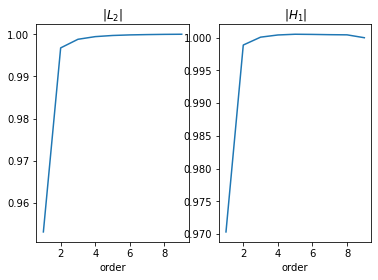

In [5]:
plt.figure(1)
plt.subplot(121)
plt.plot(k, L2Error/L2Error[-1])
plt.xlabel('order')
plt.title('$\|L_2 \|$')

plt.subplot(122)
plt.plot(k, H1Error/H1Error[-1])
plt.xlabel('order')
plt.title('$\\|H_1 \\|$')

plt.show()